# Episode 21. Time Series Forecasting with MLP


## Import Libraries

In [1]:
'''
TASK AT HAND: Using data provided in a .csv file, the goal is to train a time 
              series foreccasting model to predict the current and future trends
              of GDP based on certain features.
'''

'''
COMPARISON: Both time series are graphed below for comparison, but here is a 
            quick summary of the results: The MLP model was a better fit, and its
            predicted values stayed much tighter to the true values especially
            in large up/downturns. The CNN model seemed to have too shallow of
            a trend, fairly consistenly staying underneath than the true values.
            With more layers and pooling layers, there is a possibility that the
            more complex CNN model becomes more effective than the MLP model.
'''
# imports libraries required for model trainings and data visualization

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam

# configure displays for data visualizations
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [2]:
# upload file containing training and test data
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import files
uploaded = files.upload()

Saving RSXFSN.csv to RSXFSN (2).csv


In [3]:
# read .csv data into pandas dataframe
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [4]:
# isolate desired columns and drop the rest from the dataframe
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [5]:
# split data frame so isolate training from test data, as it stands,
# 80% of this data will be training data, and 20% will be used for testing

# split train & test data
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
print(len(train), len(test))

300 75


In [6]:
# defines a function to return time series dimension representing provided 
# dataset x, and desired steps, returns result as a pair of nummpy arrays 
# for x and y values 

def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [7]:
# calls above function to get time series dimension from given data read 
# from the .csv file

n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Modeling with MLP

In [8]:
# defines model using imported libraries and specifications such as activation
# function and loss function

# define model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

## Training

In [9]:
# fits model to training data (80%)

# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 29ms/step - loss: 906.8212 - val_loss: 1239.7823
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 385.2925 - val_loss: 454.7433
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 114.8292 - val_loss: 99.5433
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 18.8371 - val_loss: 9.3707
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 6.3611 - val_loss: 15.8137
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 11.3457 - val_loss: 21.3972
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 9.3961 - val_loss: 13.2302
Epoch 8/500
8/8 [==============================] - 0s 14ms/step - loss: 5.5654 - val_loss: 7.7356
Epoch 9/500
8/8 [==============================] - 0s 10ms/step - loss: 4.5245 - val_loss: 7.3622
Epoch 10/500
8/8 [==============================] - 0s 16ms/step - loss: 4.7483 - val_loss: 7.6530
Epoch 1

## Evaluation

In [10]:
# tests newly fit model on testing data (20%)

y_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


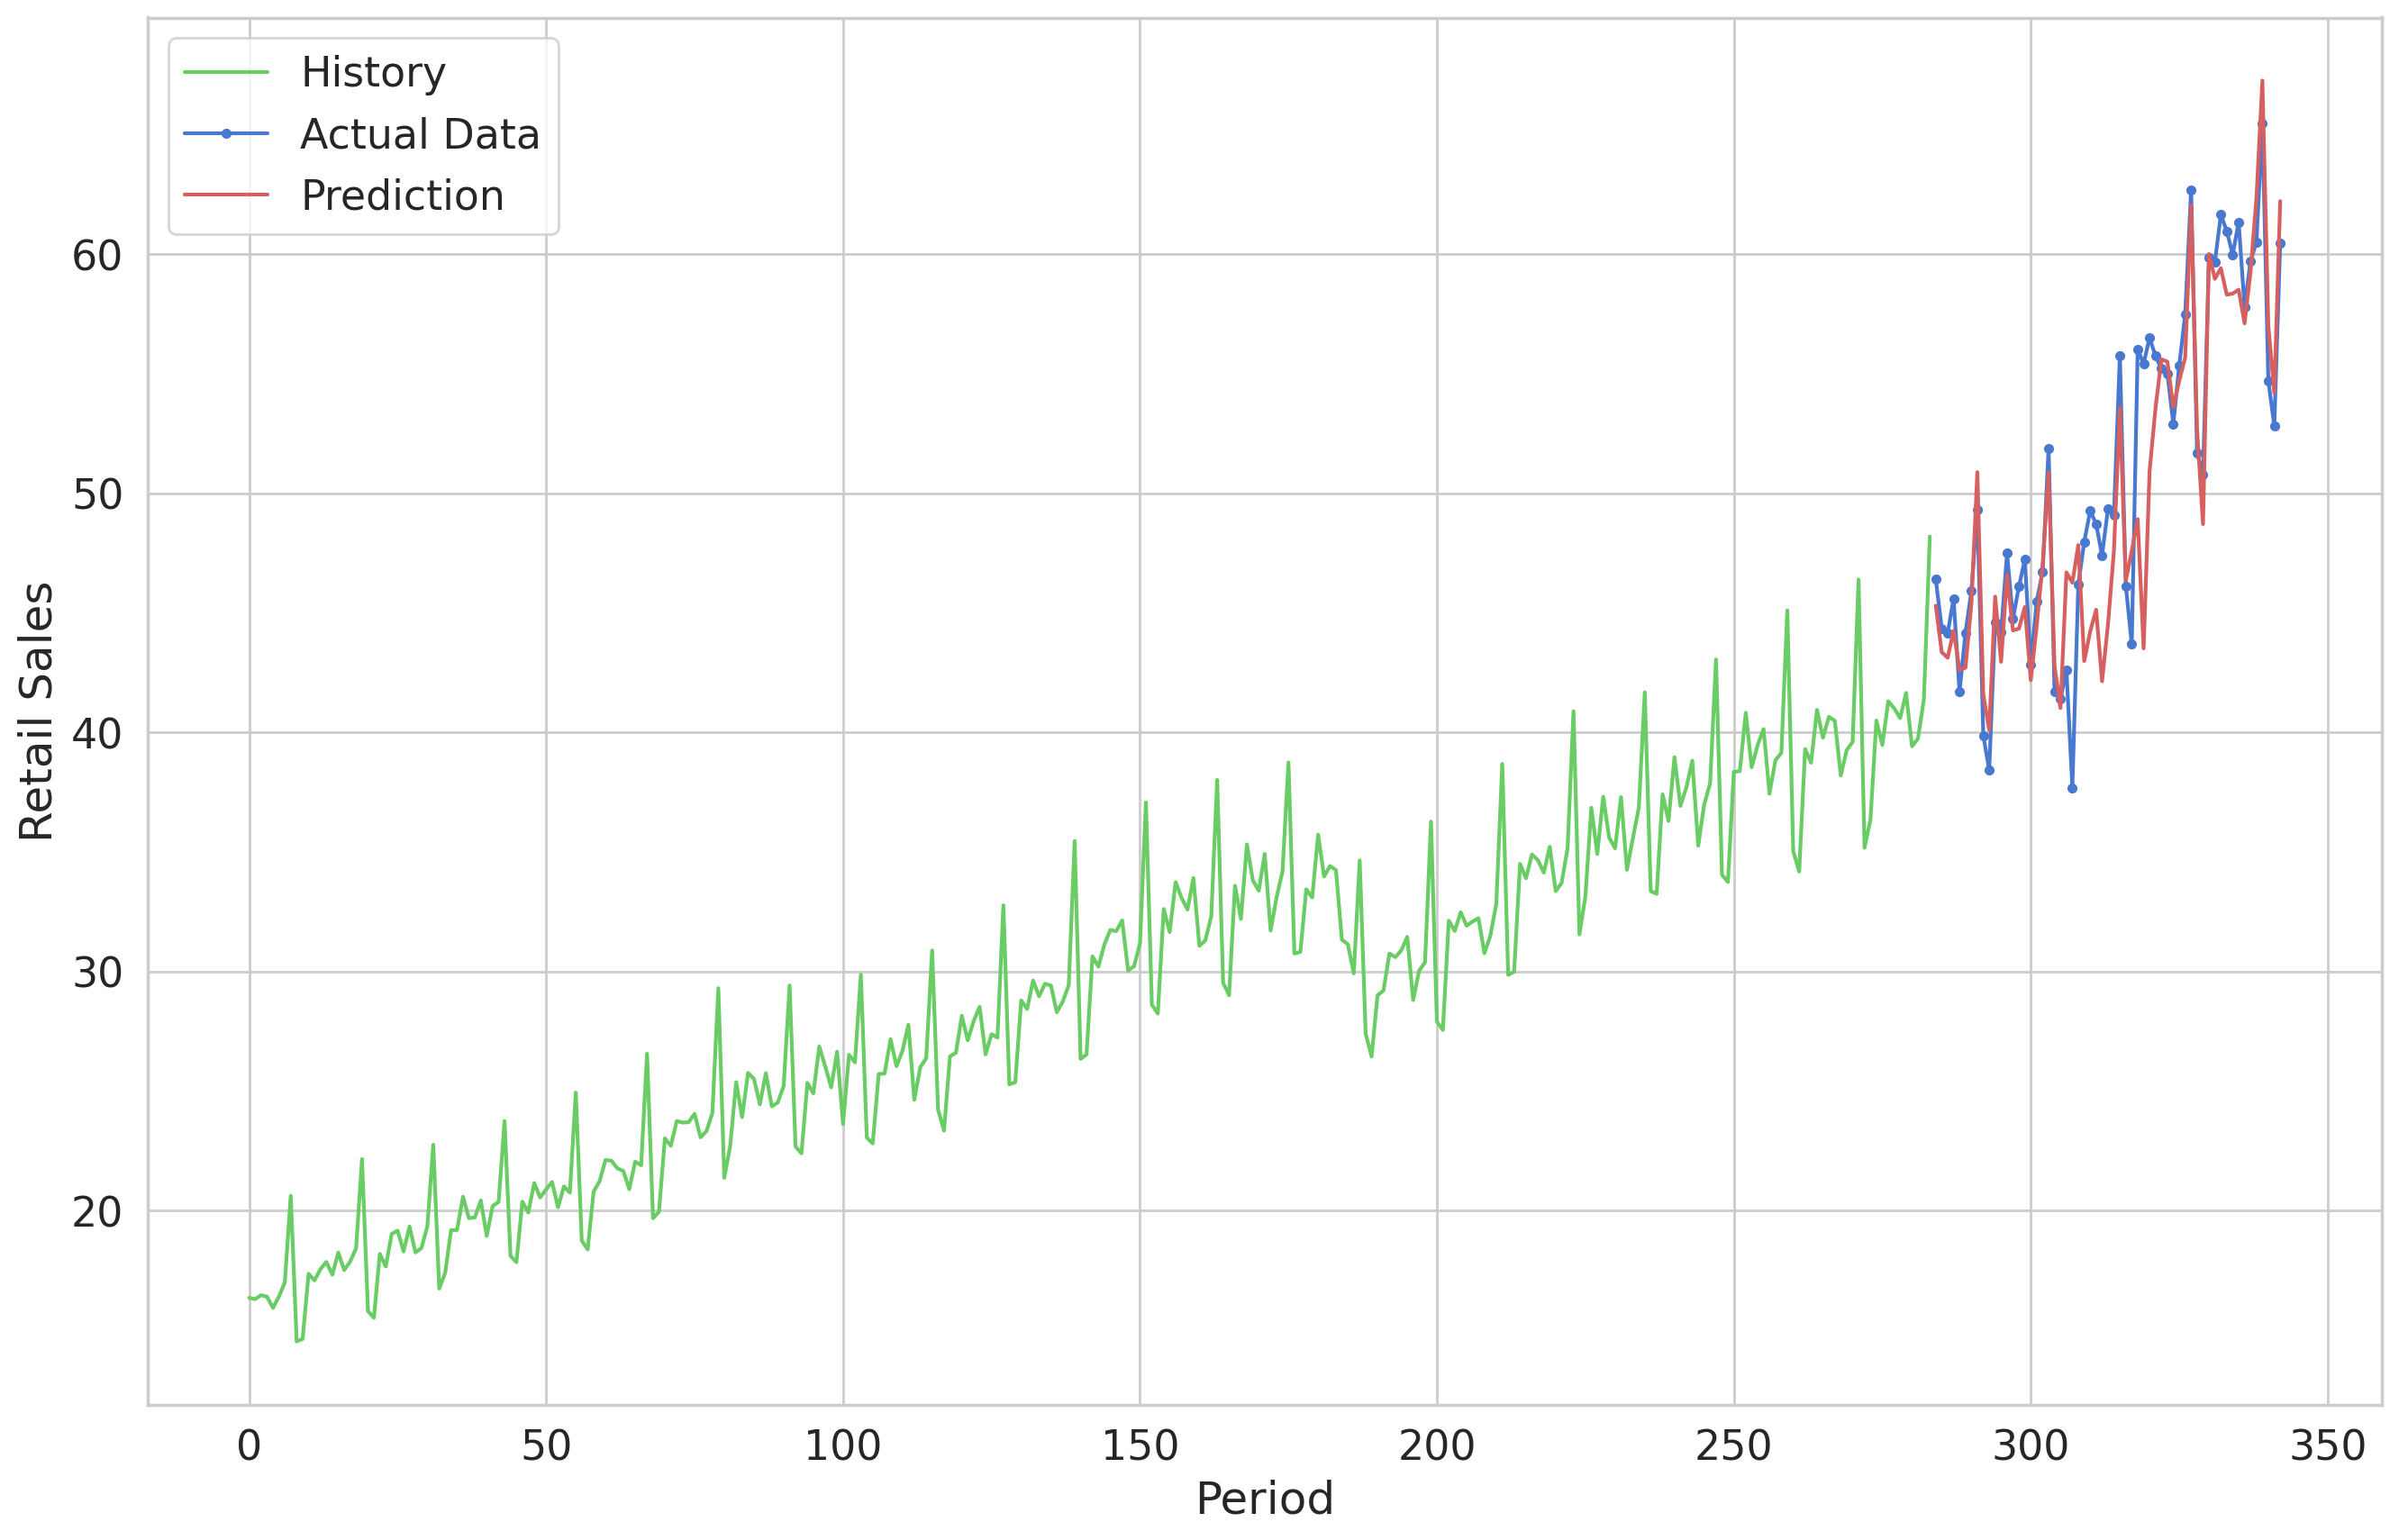

In [11]:
# plot timeseries alongside historic data to visualize predicted trend

plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

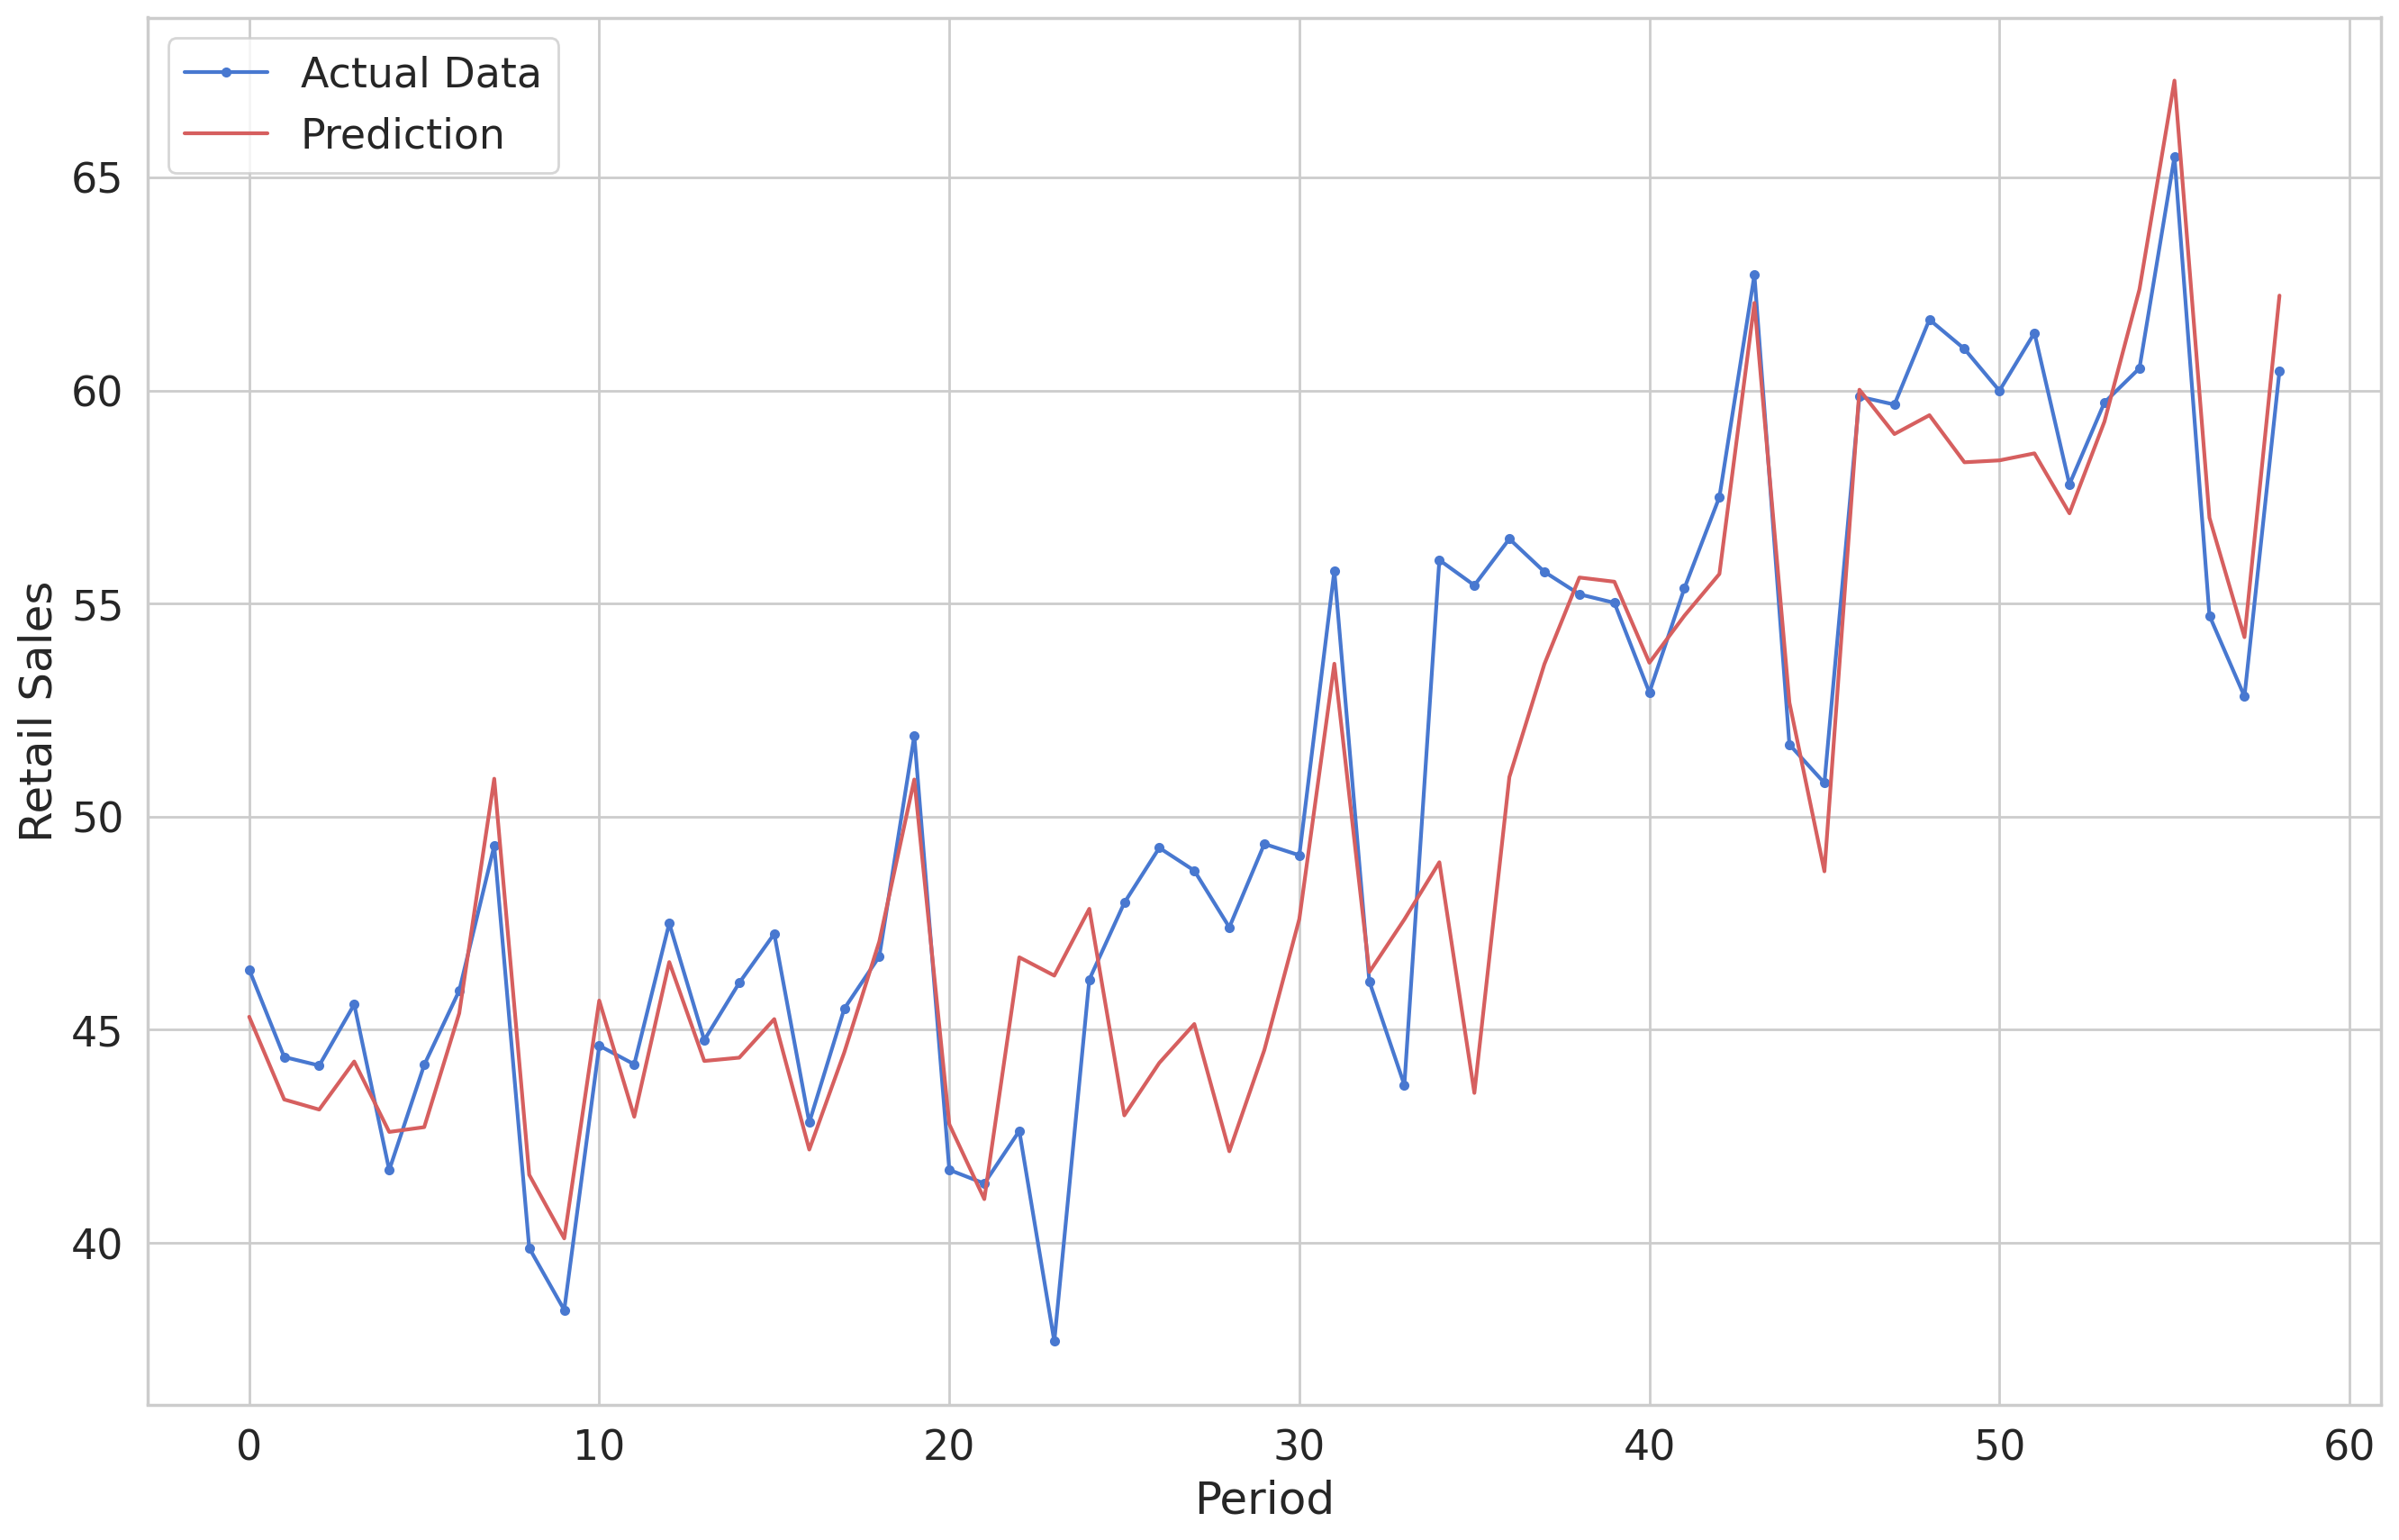

In [12]:
# plot timeseries against true values to visualize accuracy using matplotlib

plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

## Modeling with 1-Dim CNN

In [13]:
# calls above function to get time series dimension from given data read 
# from the .csv file

n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


In [15]:
# Tensorflow 1-D CNN, with filters # indicating dimensions of output space, 
# kernel_size indicating the length of the convolutional window, the activation 
# function (kept same as MLP for more reliable comparison), and padding parameter
# which I don't believe is necessary in this case, but is useful in case 
# output and input have different dimensions, to allow ease of representation
# in graphs.

# define model 
model_new = Sequential()
model_new.add(Conv1D(filters= 32, kernel_size=3, activation='relu',padding='same', input_shape=(16, 1)))
model_new.add(Dense(1))
model_new.compile(loss='mean_squared_error', optimizer=Adam(0.001))

In [16]:
# fits model to training data (80%)

# fit model
history = model_new.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 31ms/step - loss: 735.2076 - val_loss: 1299.9036
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 557.0371 - val_loss: 968.2997
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 406.4223 - val_loss: 691.8013
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 282.7480 - val_loss: 468.5087
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 186.1396 - val_loss: 300.0406
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 116.4330 - val_loss: 183.2293
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 70.2159 - val_loss: 108.9275
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 42.3156 - val_loss: 66.3666
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 27.3393 - val_loss: 44.9721
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 20.4230 - val_loss: 35

In [17]:
# tests newly fit model on testing data (20%)

y_pred = model_new.predict(x_test)

2/2 [==============================] - 0s 7ms/step


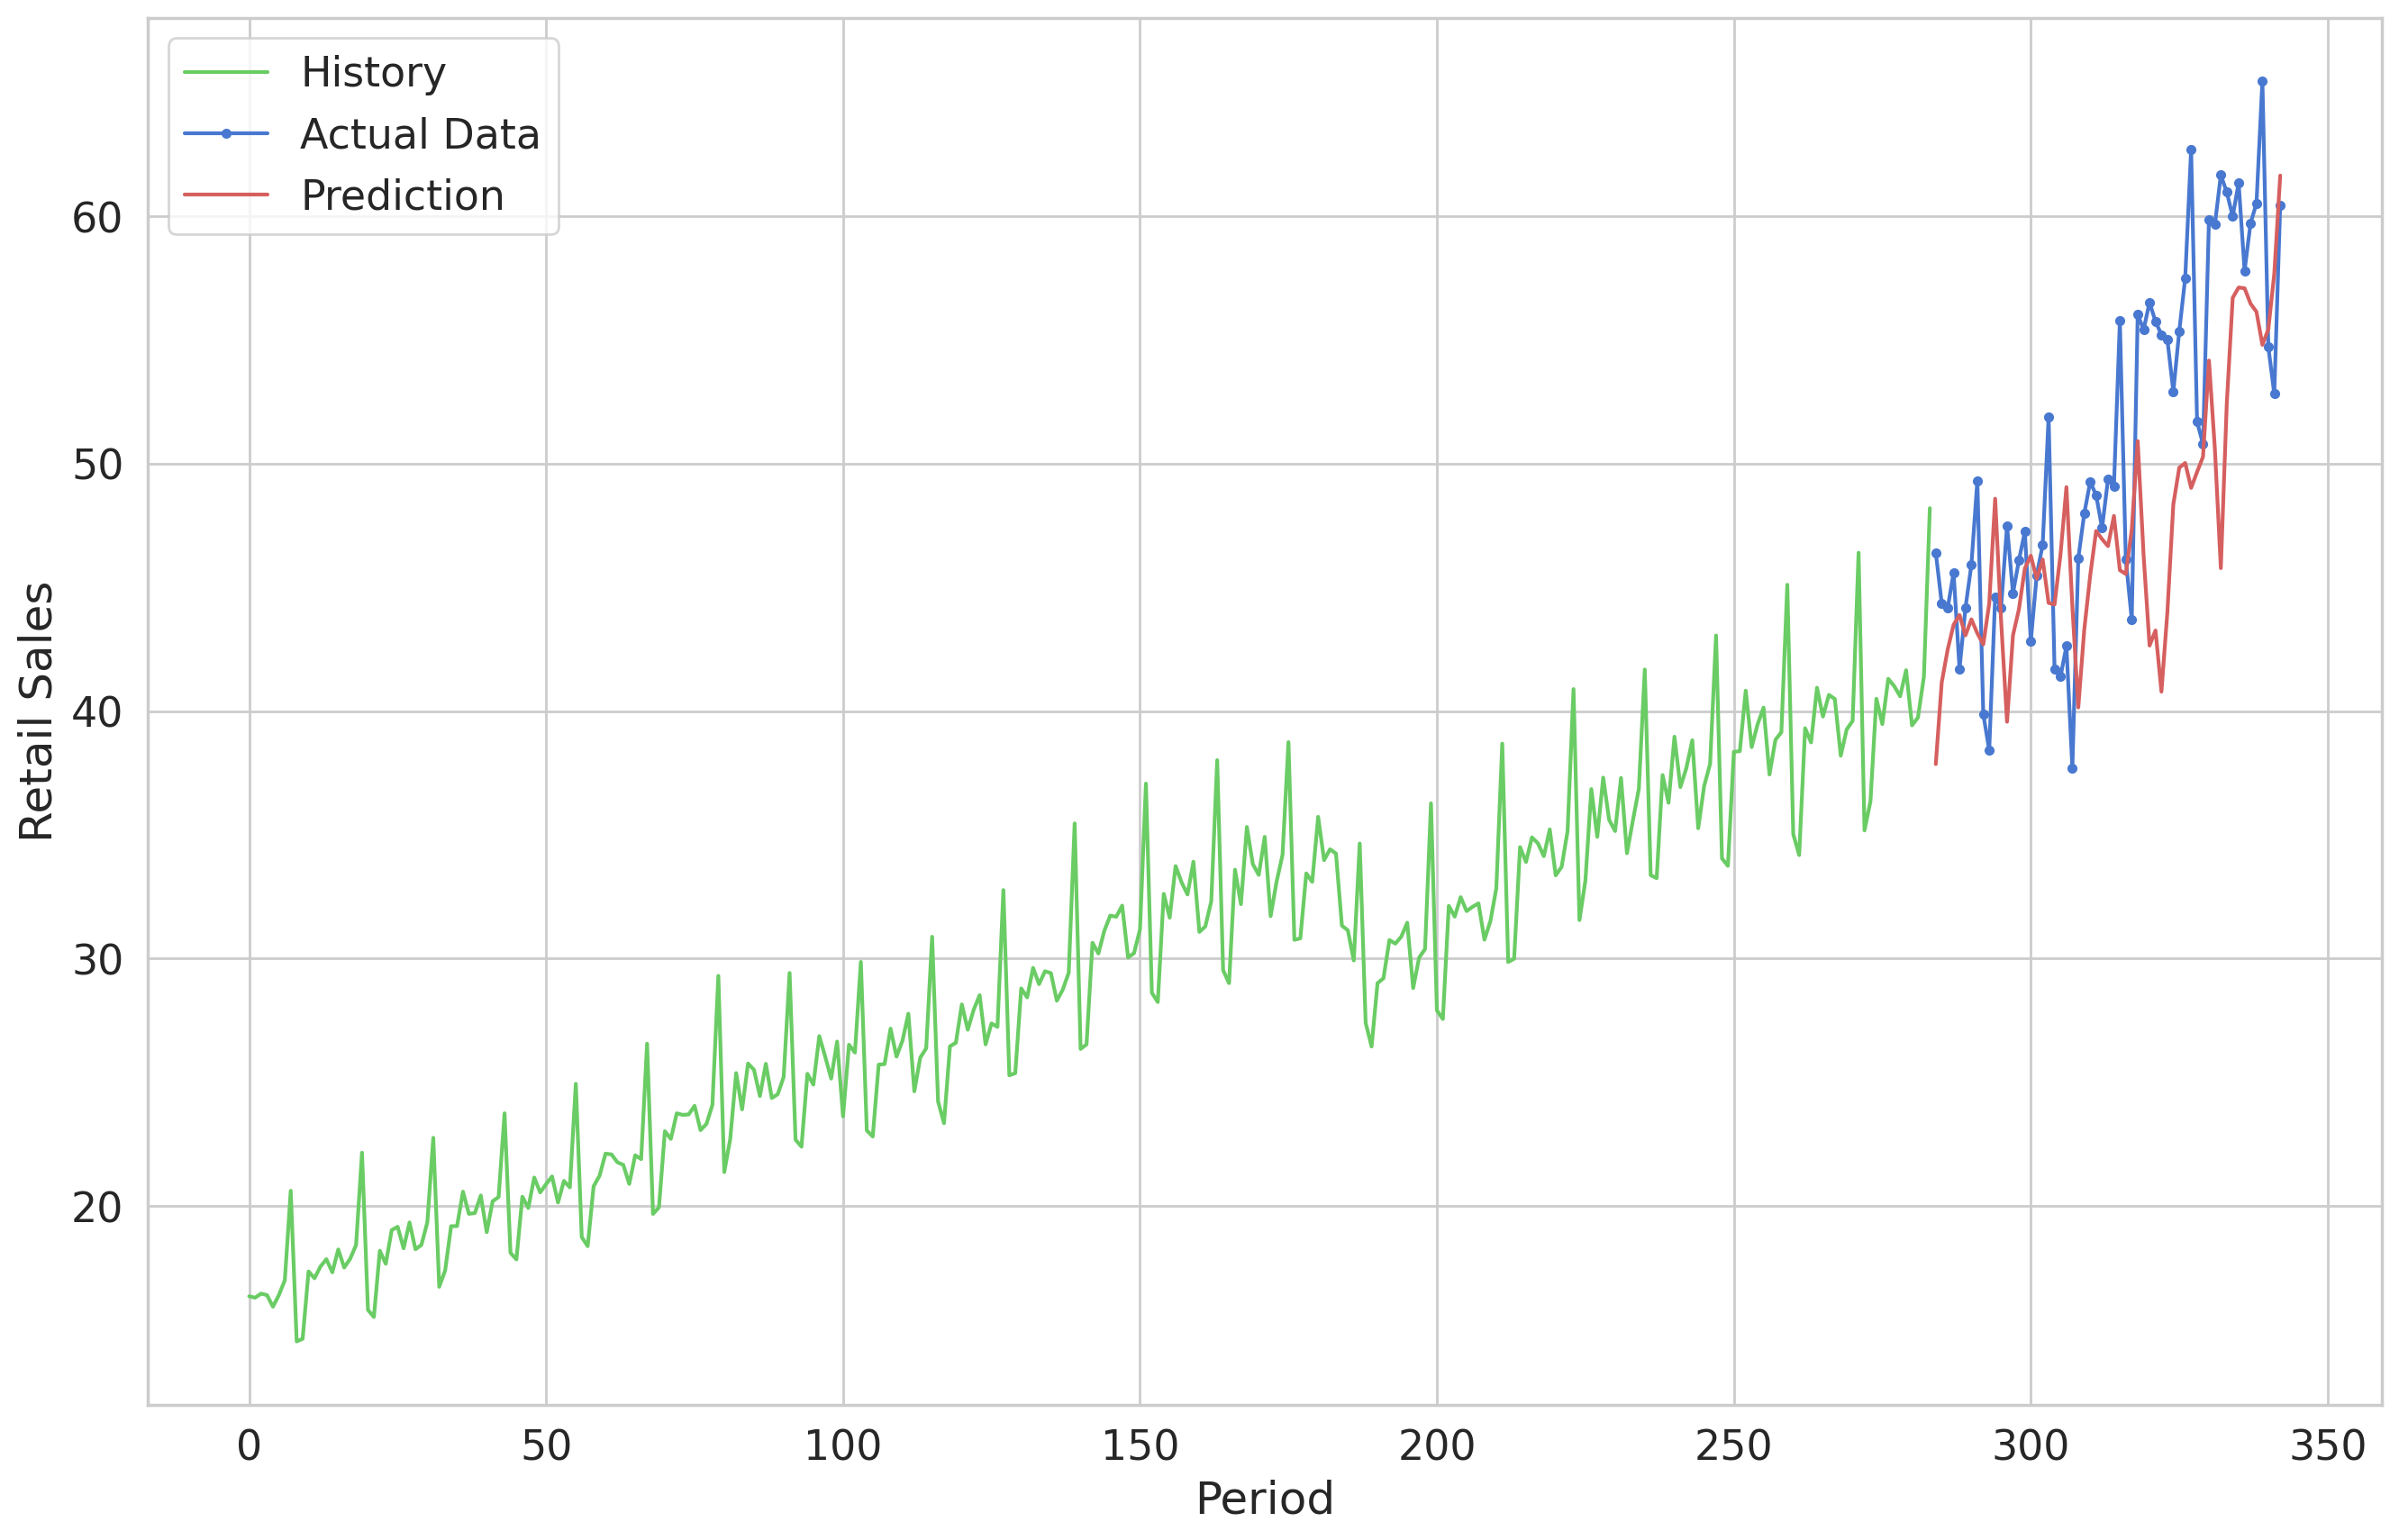

In [18]:
# plot timeseries alongside historic data to visualize predicted trend

plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred[:, 0, 0], 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

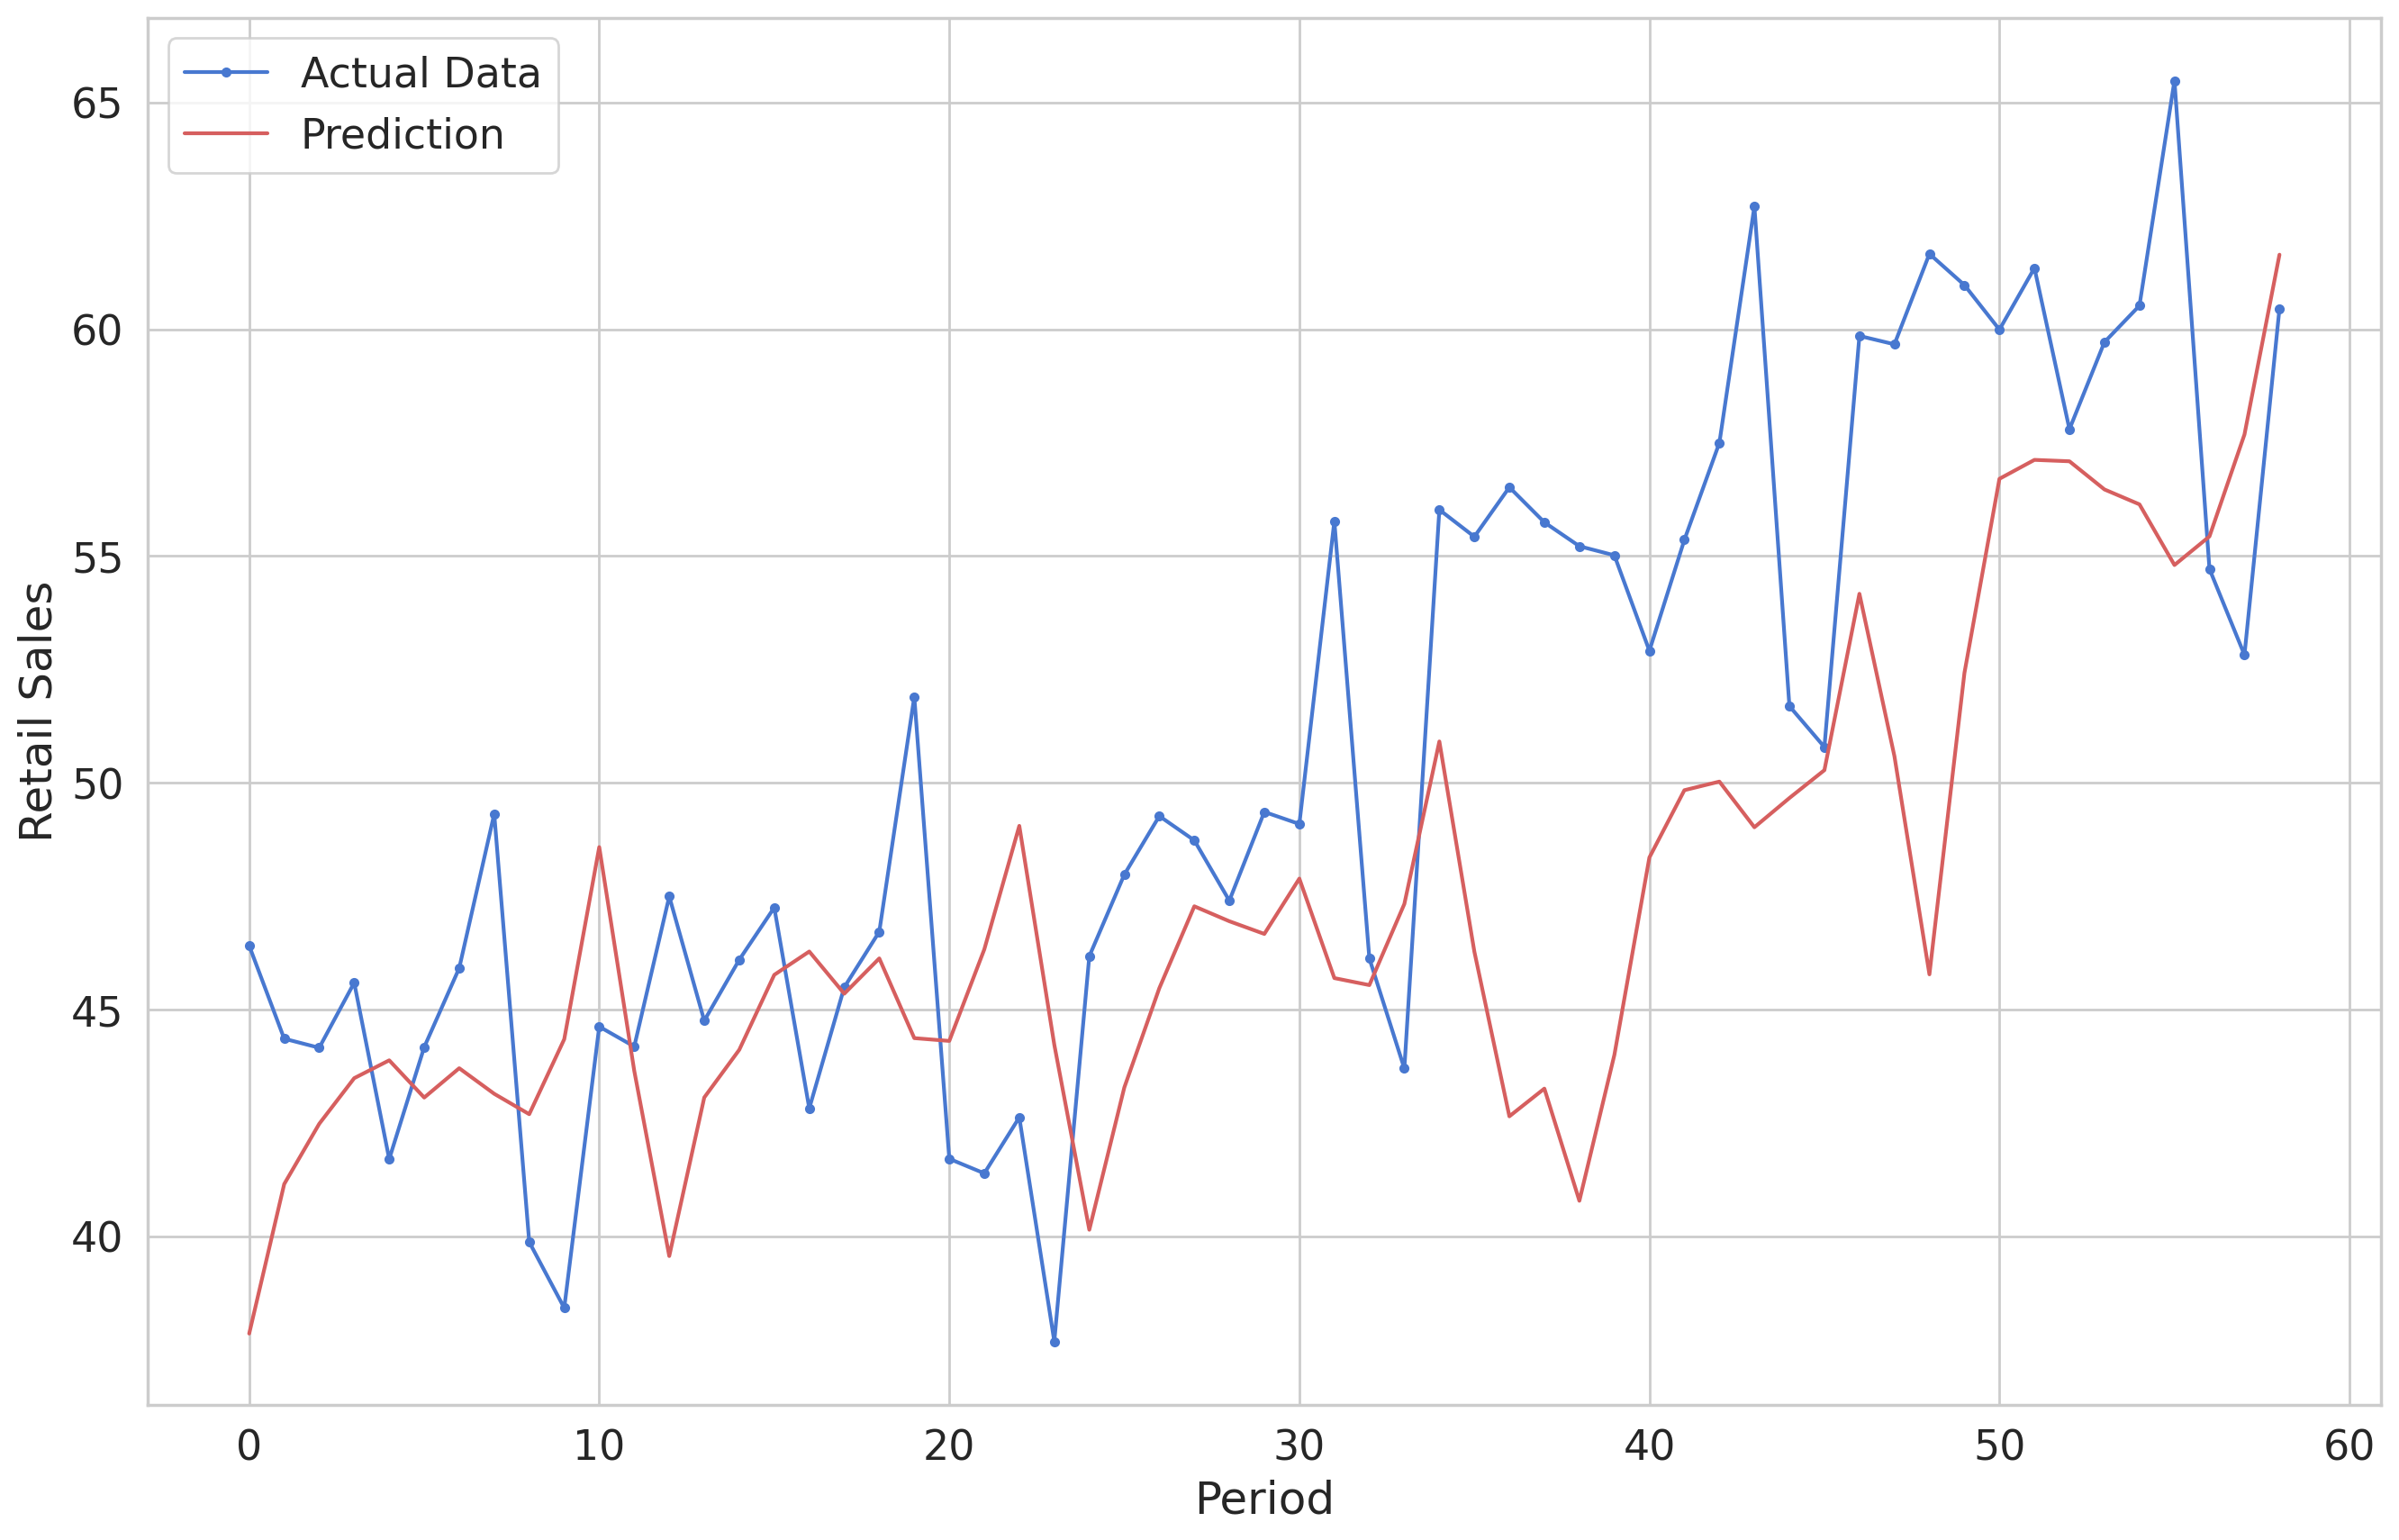

In [19]:
# plot timeseries against true values to visualize accuracy using matplotlib

plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred[:, 0, 0], 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();